# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
f = "merged_HG00129.txt"

In [3]:
df = pd.read_csv(f, header=None)
df = df.astype(str)

df

,0
0,chr10:102885491-102885839/ 120 4 124 chr10:102...
1,chr10:103337767-103338096/ 124 22 146 chr10:10...
2,chr10:10451447-10451779/ 20 80 100 chr10:10451...
3,chr10:105917786-105918126/ 82 32 114 chr10:105...
4,chr10:10666573-10666897/ 38 70 108 chr10:10666...
...,...
1832,chrX:88488057-88488366/ 16 40 56 chrX:88488072...
1833,chrX:94309970-94310312/ 66 4 70 chrX:94309987 0/0
1834,chrX:96751638-96751966/ 40 12 52 chrX:96751651...
1835,chrX:96939661-96939977/ 46 0 46 chrX:96939674 0/0


In [4]:
# split column into multiple columns by delimiter 
df = df[0].str.split(' ', expand=True)
df

,0,1,2,3,4,5
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [5]:
# locus = dir_name
df.columns = ["locus1", "f2_count_REF", "f2_count_ALT", "f2_count", "locus2", "genotype"]

In [6]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df = df.astype(dict_type_convert)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0/0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0/0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,1/1
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,0/1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,1/1
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,0/1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0/0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0/0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0/0


In [7]:
df.groupby(by="genotype")["f2_count_REF"].mean()

genotype
./.    103.333333
0/0    121.331887
0/1     67.265823
1/1     33.698630
Name: f2_count_REF, dtype: float64

In [8]:
df["genotype"] = df["genotype"].map({"0/0":0,
                             "0/1":1,
                             "1/1":2,
                             "./.":3,
                             np.nan:4},
                             na_action=None)
df

,locus1,f2_count_REF,f2_count_ALT,f2_count,locus2,genotype
0,chr10:102885491-102885839/,120,4,124,chr10:102885500,0
1,chr10:103337767-103338096/,124,22,146,chr10:103337782,0
2,chr10:10451447-10451779/,20,80,100,chr10:10451456,2
3,chr10:105917786-105918126/,82,32,114,chr10:105917801,1
4,chr10:10666573-10666897/,38,70,108,chr10:10666580,2
...,...,...,...,...,...,...
1832,chrX:88488057-88488366/,16,40,56,chrX:88488072,1
1833,chrX:94309970-94310312/,66,4,70,chrX:94309987,0
1834,chrX:96751638-96751966/,40,12,52,chrX:96751651,0
1835,chrX:96939661-96939977/,46,0,46,chrX:96939674,0


In [9]:
df.info()
#df = df["genotype"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   locus1        1837 non-null   object
 1   f2_count_REF  1837 non-null   int32 
 2   f2_count_ALT  1837 non-null   int32 
 3   f2_count      1837 non-null   int32 
 4   locus2        1837 non-null   object
 5   genotype      1837 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 64.7+ KB


In [10]:
y = df["genotype"].to_numpy()
X = df.iloc[:, 1:4].to_numpy()
X

array([[120,   4, 124],
       [124,  22, 146],
       [ 20,  80, 100],
       ...,
       [ 40,  12,  52],
       [ 46,   0,  46],
       [ 80,   8,  88]])

### A function for plotting the importance of features

In [11]:
features_names = ["Reads mapped in proper pair on the REF", "Reads mapped in proper pair on the ALT" ,"Reads mapped in proper pair"]
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[ 86,  18, 104],
       [148,  22, 170],
       [ 26, 100, 126],
       ...,
       [ 24,  84, 108],
       [134,  14, 148],
       [162,  16, 178]])

In [13]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [14]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

In [15]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[179   7   0   0]
 [  5  86   8   0]
 [  0  10  72   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       186
           1       0.83      0.87      0.85        99
           2       0.90      0.88      0.89        82
           3       0.00      0.00      0.00         1

    accuracy                           0.92       368
   macro avg       0.68      0.68      0.68       368
weighted avg       0.91      0.92      0.91       368

0.9157608695652174


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 4.33006476 -6.31528363 -1.97887582]
 [-1.00020872  1.13881883  0.13636591]
 [-3.54908374  3.99132559  0.43923045]
 [ 0.2192277   1.1851392   1.40327946]]


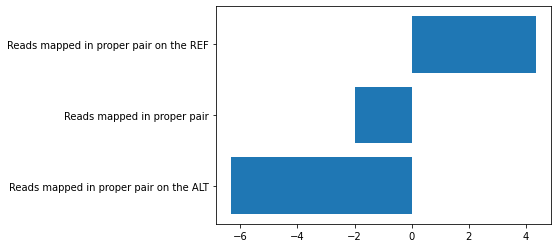

In [16]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [17]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.9183209119825404


## Random Forest

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [19]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[182   1   1]
 [  5  69  14]
 [  1  19  76]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       184
           1       0.78      0.78      0.78        88
           2       0.84      0.79      0.81        96

    accuracy                           0.89       368
   macro avg       0.86      0.85      0.86       368
weighted avg       0.89      0.89      0.89       368

0.8885869565217391


In [21]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.8985674816001484


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [22]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [24]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [25]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.9189895753523253


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[[ 3.42572209 -4.93536243 -1.50964033]
 [ 2.3097115  -2.90877303 -0.59906153]
 [ 0.31393072 -0.68583645 -0.37190573]
 [ 1.80524702 -2.13555151 -0.3303045 ]
 [-0.03988188 -0.43870063 -0.4785825 ]
 [-0.07976375 -0.1595275  -0.23929125]]


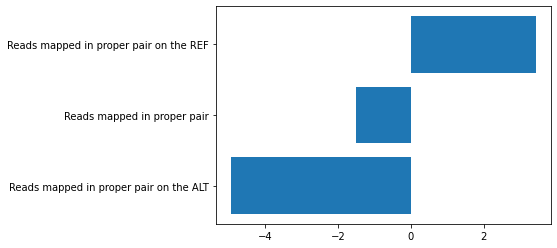

array([2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0,
       1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [26]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [27]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[184   2   0   0]
 [  3  81  17   0]
 [  0   6  74   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       186
           1       0.91      0.80      0.85       101
           2       0.81      0.93      0.87        80
           3       0.00      0.00      0.00         1

    accuracy                           0.92       368
   macro avg       0.68      0.68      0.68       368
weighted avg       0.92      0.92      0.92       368

0.9211956521739131


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using rbf (with non-linear boundary) as kernel

In [28]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.9142276705904205


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## DNN - Deep Neural Network

In [29]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,120.0,4.0,124.0
1,124.0,22.0,146.0
2,20.0,80.0,100.0
3,82.0,32.0,114.0
4,38.0,70.0,108.0
...,...,...,...
1832,16.0,40.0,56.0
1833,66.0,4.0,70.0
1834,40.0,12.0,52.0
1835,46.0,0.0,46.0


In [32]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "0/1", "1/1", "./."])
df_GIAB_2_y

,0/0,0/1,1/1,./.
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
1832,0,1,0,0
1833,1,0,0,0
1834,1,0,0,0
1835,1,0,0,0


In [39]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(10, activation='relu', name='layer_3')) # tahn
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

C:\Users\Yumika\AppData\Local\Temp\ipykernel_29624\237997923.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [40]:
history = estimator.fit(X_train, y_train)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 3)


In [41]:
history.history["accuracy"]

NameError: name 'history' is not defined

In [ ]:
history.history["loss"]

In [ ]:
estimator.predict(X_test)

In [ ]:
y_test

In [ ]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

In [ ]:
y_test = y_test2["genotype"].to_numpy()

In [ ]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model().fit(X_train, y_train, epochs=200)

In [ ]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 